In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sea

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
import matplotlib.gridspec as gridspec

# model evaluation & tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


## 1- Introduction

Churn prediction involves identifying at-risk customers who are likely to cancel their subscriptions or close/abandon their accounts.
In this project, we will build a model to predict how likely a customer will churn by analyzing its charcteristics:
- demographic information
- account information
- services information

## 2- Exploratory Data Analysis

In [2]:
df = pd.read_csv(r'C:\Users\haifa\Albayrak Internship\Projects\Customer Churn Prediction\data.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#check unique value for each column
for column in df.columns:
    print('Column: {} - Unique Value: {} '.format(column,df[column].unique()))

Column: customerID - Unique Value: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 
Column: gender - Unique Value: ['Female' 'Male'] 
Column: SeniorCitizen - Unique Value: [0 1] 
Column: Partner - Unique Value: ['Yes' 'No'] 
Column: Dependents - Unique Value: ['No' 'Yes'] 
Column: tenure - Unique Value: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
Column: PhoneService - Unique Value: ['No' 'Yes'] 
Column: MultipleLines - Unique Value: ['No phone service' 'No' 'Yes'] 
Column: InternetService - Unique Value: ['DSL' 'Fiber optic' 'No'] 
Column: OnlineSecurity - Unique Value: ['No' 'Yes' 'No internet service'] 
Column: OnlineBackup - Unique Value: ['Yes' 'No' 'No internet service'] 
Column: DeviceProtection - Unique Value: ['No' 'Yes' 'No internet service'] 
Column: TechSuppor


As shown here, there are 19 independent variables which can be classiefied in 3 groups : 

(1) Demorgaphic Information

- gender : Male or Female
- SeniorCitizen : Whether the customer is a senior citizen or not (0 or 1)
- Partner : Whether the customer has a partner or not(Yes or No)
- Dependents : Whether the customer has dependents or not(Yes or No)
  
(2) Customer Account Information

- tenure : Number of months the customer has used the service(numbers)
- Contract : (Month-to-month,One year,Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes or No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer, 'Credit car'
- MonthlyCharges : The amount charged to the customer monthly (numbers)
- TotalCharges : The total amount charged to the customer(numbers).

(3)Services Information

- PhoneService : Whether the customer has a phone service or not(Yes or No)
- MultipleLines : Whether the customer has multiple lines or not (No phone Service, No, Yes)
- InternetService : Customer’s internet service provider(DSL,Fiber optic,No)
- OnlineSecurity : Whether the customer has online security or not(No,Yes,No internet service)
- OnlineBackup : Whether the customer has online backup or not(No,Yes,No internet service)
- DeviceProtection : Whether the customer has device protection or not (No,Yes,No internet service)
- TechSupport : Whether the customer has tech support or not(No,Yes,No internet service)
- StreamingTV : Whether the customer has streaming TV or not(No,Yes,No internet service)
- StreamingMovies : Whether the customer has streaming movies or not(No,Yes,No internet service)  or notn


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- We can notice that there are no null values in our data, which we will make sure more about it later.
- However, we observe that TotalCharges was wrongly detected as object, instead of being a numeric variable, we need to transform it later.

## 3- Data Preprocessing

In [8]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#check if there are any values in TotalCharges, where the tenure attribute is 0
df.loc[df['tenure'] == 0, ['tenure', 'TotalCharges', 'Churn']]

,tenure,TotalCharges,Churn
488,0,,No
753,0,,No
936,0,,No
1082,0,,No
1340,0,,No
3331,0,,No
3826,0,,No
4380,0,,No
5218,0,,No
6670,0,,No


In [10]:
df.loc[488, 'TotalCharges']

' '

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()

11

Our data contains 11 NaN values, so we need to replace these values by numeric values, thge mean

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].isna().sum()

0

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
data_null_total = pd.DataFrame(df.isna().sum()).T.rename({0:'total null'})
data_null_total

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#drop customerID
df.drop(columns='customerID', inplace=True)

- Numerical Data

In [16]:
num = ["tenure", "MonthlyCharges", "TotalCharges"]

In [17]:
variation_numerical = dict() #initializes an empty dictionary called variation_numerical that will store the range (min-max) of each numerical column.
for column in num:
    tmp = f'{df[column].min()} - {df[column].max()}' #For each numerical column, it computes the minimum and maximum values , It then creates a string in the format "min - max"
    variation_numerical[column] = tmp #This string is stored in the variation_numerical dictionary 
    
tmp = pd.Series(variation_numerical)#The variation_numerical dictionary is converted to a pandas Series called tmp. Each entry in the Series represents a numerical column and its min-max range.
data_variation_numerical = pd.DataFrame(tmp).T.rename({0: 'data variation'}) #Convert Series to DataFrame and Rename:
data_variation_numerical

,tenure,MonthlyCharges,TotalCharges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


-  Categorical Data

In [18]:
cat = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
       "MultipleLines", "InternetService", "OnlineSecurity",
       "OnlineBackup", "DeviceProtection", "TechSupport",
       "StreamingTV", "StreamingMovies", "Contract",
       "PaperlessBilling", "PaymentMethod"]

In [19]:
variation_categorical = dict() 
for column in cat:
    tmp = df[column].unique().tolist()
    tmp.sort()
    variation_categorical[column] = ', '.join(str(item) for item in tmp)  
    
tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa..."


In [20]:
data_type_python = pd.DataFrame(df.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


In [21]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa..."


- remove automic process in the payment ways, These denominations are too long to be used as tick labels in further visualization, so here we will remove this classification

In [22]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [23]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)','',regex=False)

In [24]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

- usless /redundant values = the MultipleLine attribute has a category of No phone service. It's a redundant category, because if the customer doesn't have phone service (phone_service = No), then they can't have multiple lines service, which requires phone service. Same case for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTv, and StreamingMovies.
These services require internet service.
My solution is simply replace these categories to No. This solution is also used to avoid multicollinearity and reduce the dataset dimension.

In [25]:
# replace redundant values
df.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

In [26]:
variation_categorical = dict() 
for column in cat:
    tmp = df[column].unique().tolist()
    tmp.sort()
    variation_categorical[column] = ', '.join(str(item) for item in tmp)  
tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation


,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer, Credit card, Electronic check, ..."


## 4- Feature Engineering

In [27]:
for column in df.columns:
    
    print("Feature name: {}".format(column))
    print("Unique values:")
    print(df[column].unique())
    print("--------------------------------------------------\n")

Feature name: gender
Unique values:
['Female' 'Male']
--------------------------------------------------

Feature name: SeniorCitizen
Unique values:
[0 1]
--------------------------------------------------

Feature name: Partner
Unique values:
['Yes' 'No']
--------------------------------------------------

Feature name: Dependents
Unique values:
['No' 'Yes']
--------------------------------------------------

Feature name: tenure
Unique values:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------

Feature name: PhoneService
Unique values:
['No' 'Yes']
--------------------------------------------------

Feature name: MultipleLines
Unique values:
['No' 'Yes']
--------------------------------------------------

Feature name: InternetService
Unique values:
['DSL' 'Fiber 

- Label Encoding

In [28]:
df_tr=df.copy()
label_encoding_columns = ['gender','Partner','Dependents','PaperlessBilling','PhoneService', 'Churn','MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for column in label_encoding_columns:
    if column =='gender':
        df_tr[column]=df_tr[column].map({'Female': 1, 'Male': 0})
    else :
         df_tr[column]=df_tr[column].map({'Yes': 1, 'No': 0})
        


- One-Hot Encoding

In [29]:
one_hot_encoding_columns = ['InternetService','Contract','PaymentMethod']
df_tr = pd.get_dummies(df_tr, columns=one_hot_encoding_columns)

In [30]:
#check unique value for each column
for column in df_tr.columns:
    print('Column: {} - Unique Value: {} '.format(column,df_tr[column].unique()))

Column: gender - Unique Value: [1 0] 
Column: SeniorCitizen - Unique Value: [0 1] 
Column: Partner - Unique Value: [1 0] 
Column: Dependents - Unique Value: [0 1] 
Column: tenure - Unique Value: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
Column: PhoneService - Unique Value: [0 1] 
Column: MultipleLines - Unique Value: [0 1] 
Column: OnlineSecurity - Unique Value: [0 1] 
Column: OnlineBackup - Unique Value: [1 0] 
Column: DeviceProtection - Unique Value: [0 1] 
Column: TechSupport - Unique Value: [0 1] 
Column: StreamingTV - Unique Value: [0 1] 
Column: StreamingMovies - Unique Value: [0 1] 
Column: PaperlessBilling - Unique Value: [1 0] 
Column: MonthlyCharges - Unique Value: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
Column: TotalCharges - Unique Value: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

- Feature Scaling Normalization

here we are going to transform numerical data to a common scale. After normalization, all variable have similar influence on model, improving the stability and performance of the algo.
Here we are going tı use min-max approach, which rescales the feature to a fixed range [0 , 1] by substructing min from max, then divide by the range

In [31]:
min_max_columns = ['tenure','MonthlyCharges','TotalCharges']
for column in min_max_columns:
    min_column = df_tr[column].min()
    max_column = df_tr[column].max()
    #min max scaler
    df_tr[column] = (df_tr[column]- min_column)/(max_column - min_column)

- Splitting data in training and testing sets

In [32]:
x = df_tr.drop(['Churn'],axis =1)
y = df_tr.Churn

In [33]:
feature_names = x.columns
print(feature_names)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [34]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,train_size=.3, random_state=1, stratify=y)

In [35]:
x_Train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
2272,0,0,0,1,0.013889,1,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
4867,0,0,1,0,0.472222,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
2241,1,0,1,1,0.777778,1,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False
4311,1,0,0,0,0.097222,0,0,0,1,0,...,True,False,False,True,False,False,False,True,False,False
1914,1,0,0,0,0.041667,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False


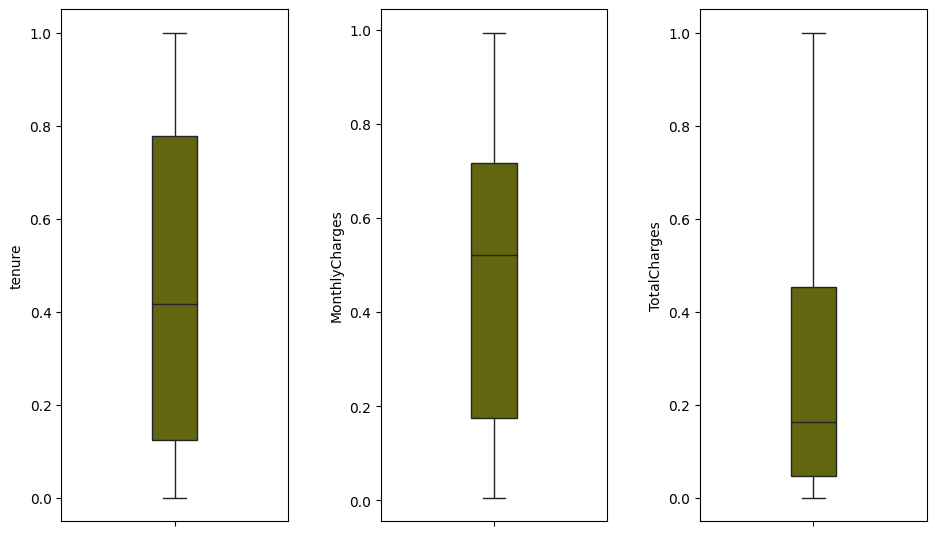

In [36]:
#Outlier check with IQR
fig, axes = plt.subplots(1, 3, figsize=(10,6))
for i, c in enumerate(x_Train[num]):
    sea.boxplot(x_Train[c], orient="v", color = "#6f7501",
                                width = 0.2, ax=axes[i])
    
fig.tight_layout(pad=3.0)

StandardScaler removes the mean and scales each feature/variable to unit variance,StandardScaler is used to standardize the input data in a way that ensures that the data points have a balanced scale,Standardize features by removing the mean and scaling to unit variance.

In [37]:
#StandardScaler is only fit to training data to prevent data leakage.
scaler = StandardScaler()

# fit to train_X
scaler.fit(x_Train)

# transform train_X
x_Train = scaler.transform(x_Train)
x_Train= pd.DataFrame(x_Train, columns = feature_names)

# transform test_X
x_Test = scaler.transform(x_Test)
x_Test = pd.DataFrame(x_Test, columns = feature_names)

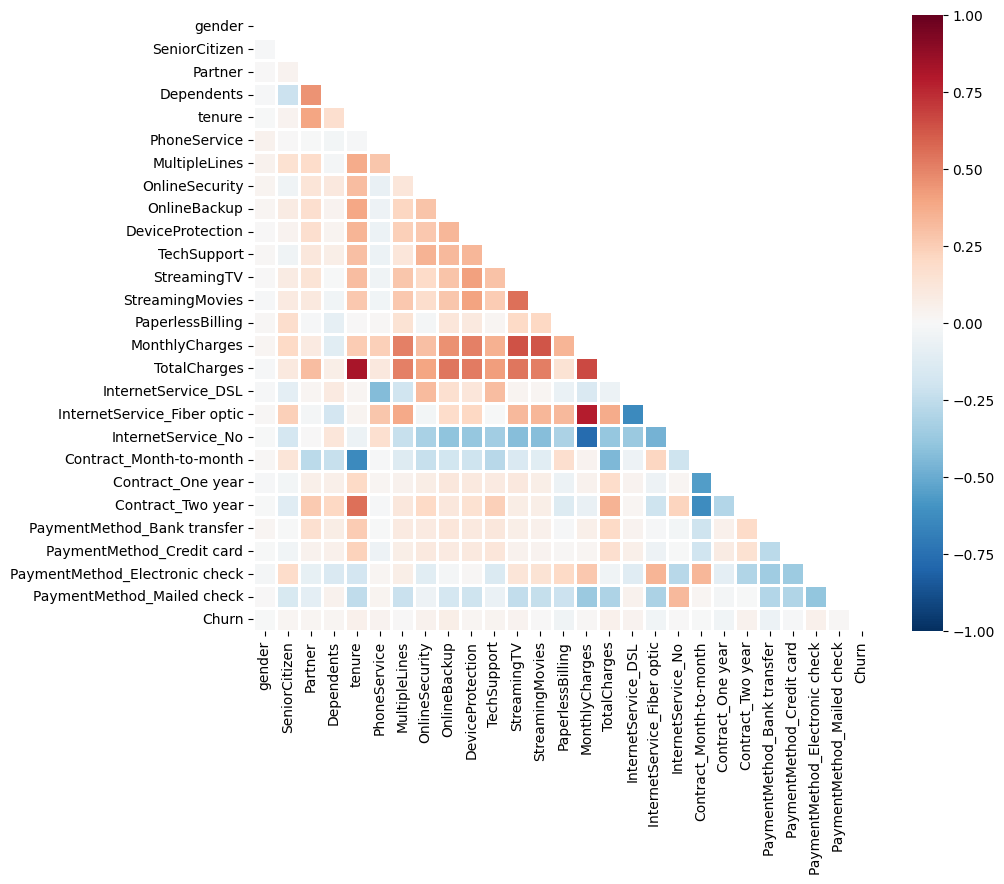

In [38]:
#Correlation Analysis
corr_matrix = pd.concat([x_Train, y_Train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,8))
sea.heatmap(corr_matrix,annot=False, fmt=".1f", vmin=-1,
            vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="RdBu_r");

## 5-Model Training and Evaluation

In [39]:
accuracies =[]
def evaluate_model(model, X_Train, y_Train, X_Test, y_Test, model_name):
    model.fit(x_Train, y_Train)
    pre = model.predict(x_Test)


   # Evaluate the model
    accuracy = accuracy_score(y_Test, pre)
    precision = precision_score(y_Test, pre)
    recall = recall_score(y_Test, pre)
    f1 = f1_score(y_Test, pre)
    roc_auc = roc_auc_score(y_Test, pre)
    conf_matrix = confusion_matrix(y_Test, pre)
     
    # Evaluate the model
    print(f"{model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Confusion Matrix:\n {conf_matrix}\n")
    accuracies.append(accuracy)
       # Return the results as a dictionary
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix
    }

In [40]:
results = []

In [41]:
logreg = LogisticRegression(max_iter=1000)
results.append(evaluate_model(logreg, x_Train, y_Train, x_Test, y_Test, "Logistic Regression"))

Logistic Regression
Accuracy: 0.8099776921516934
Precision: 0.6657754010695187
Recall: 0.5706646294881589
F1 Score: 0.6145619086795557
ROC AUC: 0.7335653351747806
Confusion Matrix:
 [[3247  375]
 [ 562  747]]



In [42]:
# k-Nearest Neighbors
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='joblib')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the k-Nearest Neighbors model and parameter grid
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(1, 31)}

# Perform Grid Search with Cross-Validation, setting n_jobs to 1
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=1)

# Assuming you have an evaluate_model function defined as per your context
results.append(evaluate_model(knn_cv, x_Train, y_Train, x_Test, y_Test, "k-Nearest Neighbors"))



  File "c:\Users\haifa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


k-Nearest Neighbors
Accuracy: 0.7894950314337863
Precision: 0.61792863359443
Recall: 0.5423987776928954
F1 Score: 0.5777054515866559
ROC AUC: 0.7105975114306553
Confusion Matrix:
 [[3183  439]
 [ 599  710]]



In [43]:
# Support Vector Machine
svm = SVC(probability=True)
param_grid_svm = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
svm_cv = GridSearchCV(svm, param_grid_svm, cv=5)
results.append(evaluate_model(svm_cv,x_Train, y_Train, x_Test, y_Test, "Support Vector Machine"))

Support Vector Machine
Accuracy: 0.7945649969580206
Precision: 0.6319073083778967
Recall: 0.5416348357524828
F1 Score: 0.5832990538872892
ROC AUC: 0.7138047177105872
Confusion Matrix:
 [[3209  413]
 [ 600  709]]



In [44]:
# Random Forest
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)
results.append(evaluate_model(rf_cv, x_Train, y_Train, x_Test, y_Test, "Random Forest"))

Random Forest
Accuracy: 0.796390184546745
Precision: 0.6511397423191279
Recall: 0.5019098548510313
F1 Score: 0.5668679896462467
ROC AUC: 0.7023629892698006
Confusion Matrix:
 [[3270  352]
 [ 652  657]]



In [45]:
# Decision Tree
dt = DecisionTreeClassifier()
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5)
results.append(evaluate_model(dt_cv, x_Train, y_Train, x_Test, y_Test, "Decision Tree"))

Decision Tree
Accuracy: 0.7540052727641452
Precision: 0.5390243902439025
Recall: 0.5064935064935064
F1 Score: 0.5222528554549035
ROC AUC: 0.6749750801379736
Confusion Matrix:
 [[3055  567]
 [ 646  663]]



In [46]:
# XGBoost
xgb = XGBClassifier()
param_grid_xgb = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200], 'max_depth': [1, 6]}
xgb_cv = GridSearchCV(xgb, param_grid_xgb, cv=5)
results.append(evaluate_model(xgb_cv, x_Train, y_Train, x_Test, y_Test, "XGBoost"))


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [65]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
# Display the results
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0     Logistic Regression  0.809978   0.665775  0.570665  0.614562  0.733565   
1     k-Nearest Neighbors  0.789495   0.617929  0.542399  0.577705  0.710598   
2  Support Vector Machine  0.794565   0.631907  0.541635  0.583299  0.713805   
3           Random Forest  0.790306   0.634936  0.494270  0.555842  0.695782   
4           Decision Tree  0.753194   0.536859  0.511841  0.524052  0.676130   
5                 XGBoost  0.811194   0.694444  0.515661  0.591846  0.716831   

            Confusion Matrix  
0  [[3247, 375], [562, 747]]  
1  [[3183, 439], [599, 710]]  
2  [[3209, 413], [600, 709]]  
3  [[3250, 372], [662, 647]]  
4  [[3044, 578], [639, 670]]  
5  [[3325, 297], [634, 675]]  


## Feature Importance : Determine and visualize feature importance for tree-based models.

- Random Forest Tree

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_Train, y_Train)

RandomForestClassifier(random_state=42)

In [69]:
feature_importance_rf = rf.feature_importances_

In [70]:
# Create a DataFrame for visualization
feature_importance_df_rf = pd.DataFrame({
    'Feature': x_Train.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

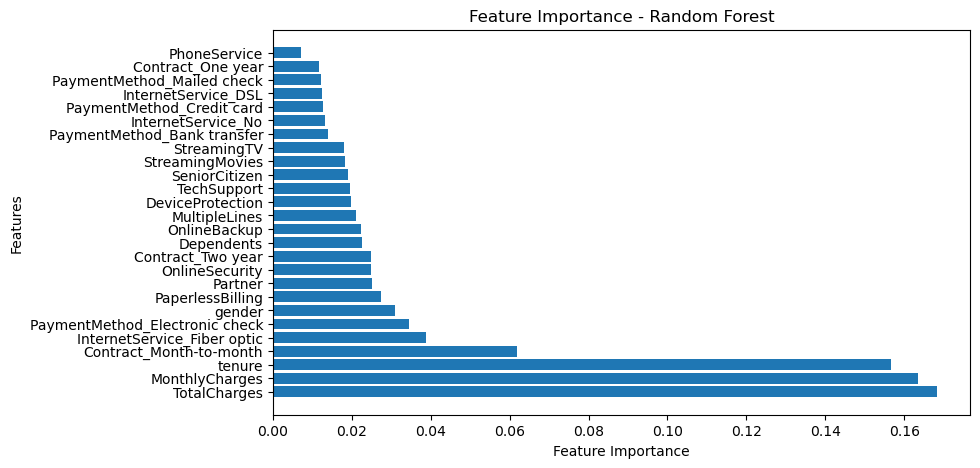

In [71]:
# Plot feature importance
plt.figure(figsize=(9, 5))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.show()

- Decision Tree

In [73]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_Train, y_Train)


DecisionTreeClassifier(random_state=42)

In [74]:
feature_importance_rf = rf.feature_importances_

In [75]:
# Create a DataFrame for visualization
feature_importance_df_rf = pd.DataFrame({
    'Feature': x_Train.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

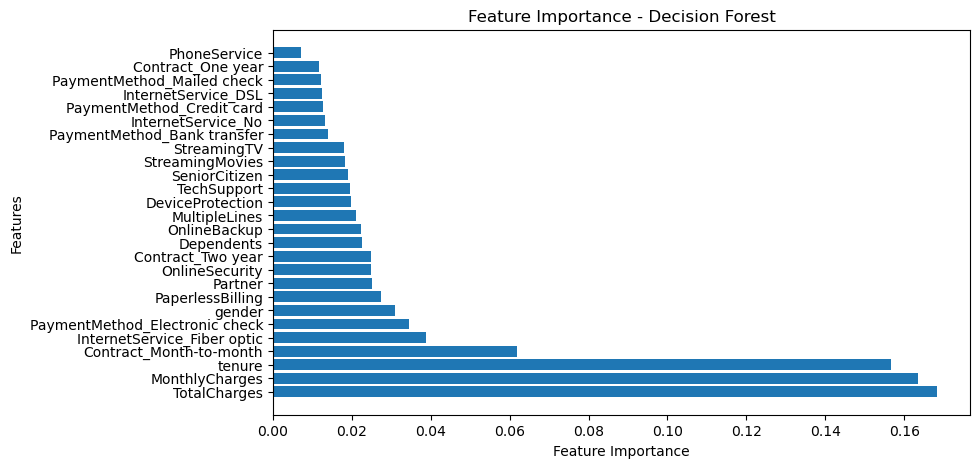

In [76]:
# Plot feature importance
plt.figure(figsize=(9, 5))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Forest')
plt.show()

- XGboost

In [78]:
xgb_model = XGBClassifier()
xgb_model.fit(x_Train, y_Train)
#use_label_encoder assumes that the target labels are already properly encoded.
#eval_metric='logloss' is typically used when you want to optimize your model for probability-based predictions

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
feature_importance_xgb = xgb_model.feature_importances_

In [80]:
# Create a DataFrame for visualization
feature_importance_df_xgb = pd.DataFrame({
    'Feature': x_Train.columns,
    'Importance': feature_importance_xgb
}).sort_values(by='Importance', ascending=False)

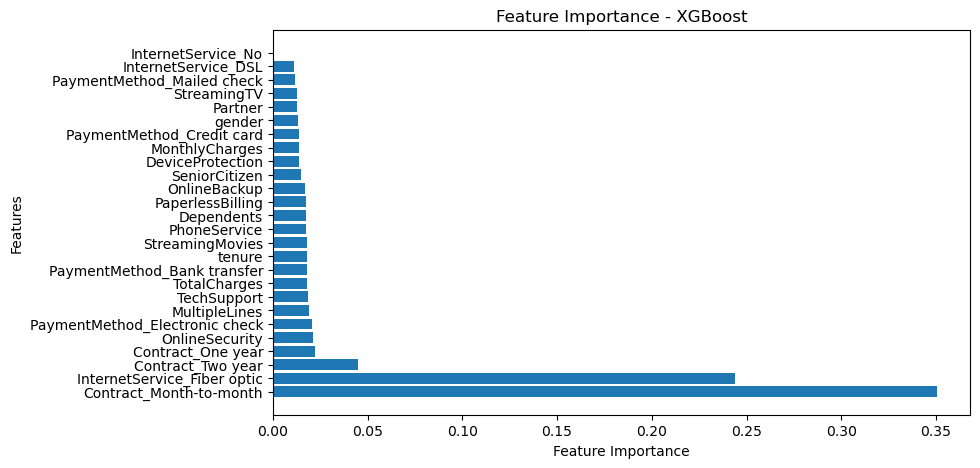

In [81]:
# Plot feature importance
plt.figure(figsize=(9, 5))
plt.barh(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - XGBoost')
plt.show()

# Model Coefficients:Analyze coefficients for linear models

In [83]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_Train, y_Train)

LogisticRegression(max_iter=1000)

In [84]:
coefficients = logreg.coef_[0]

In [85]:
coefficients_df = pd.DataFrame({
    'Feature': x_Train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

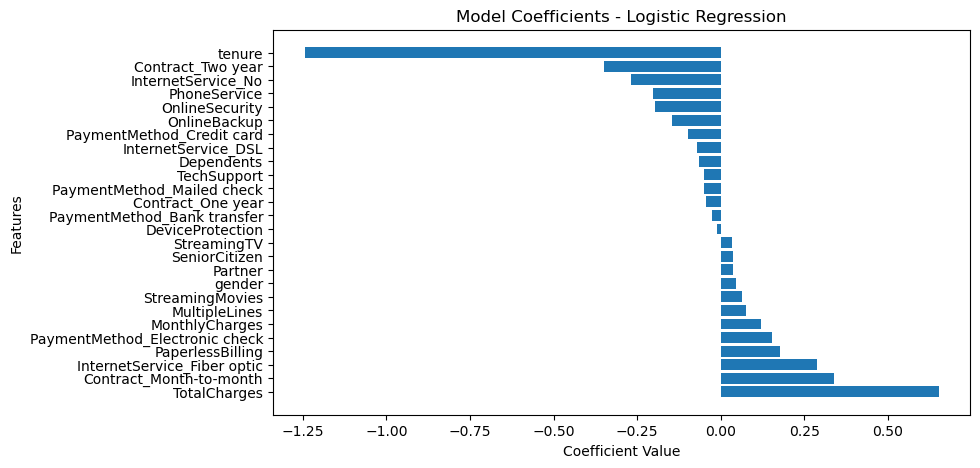

In [86]:
# Plot model coefficients
plt.figure(figsize=(9, 5))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Model Coefficients - Logistic Regression')
plt.show()

## Hyperparameter Tuning

Hyperparameter tuning allows data scientists to tweak model performance for optimal results

In [99]:
grid_parameters = {
    'n_estimators': [80, 90, 100, 110, 115, 120], 
    'max_depth': [3, 4, 5, 6],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 4, 5]
}

# Define RandomizedSearchCV object for GradientBoostingClassifier
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV instance on the training data
random_search.fit(x_Train, y_Train)

# Print the best parameters found by RandomizedSearchCV
print(random_search.best_params_)

C:\Users\haifa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
195 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\haifa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\haifa\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\haifa\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\haifa\anaconda3\Lib\site-packag

{'n_estimators': 80, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 3}


## Performance on the model

In [118]:
from sklearn.metrics import confusion_matrix
random_search_predictions = random_search.predict(x_Test)
confusion_matrix = confusion_matrix(y_Test,random_search_predictions)
confusion_matrix

array([[3292,  330],
       [ 616,  693]], dtype=int64)

total of 3662 were correctly classified(1st one true negative, 2nd one true positive) and only 1300 missclassification

In [120]:
print(classification_report(y_Test,random_search_predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3622
           1       0.68      0.53      0.59      1309

    accuracy                           0.81      4931
   macro avg       0.76      0.72      0.73      4931
weighted avg       0.80      0.81      0.80      4931



In [122]:
accuracy_score(y_Test,random_search_predictions)

0.8081525045629689

# Conclusion

- XGradient Boosting is the selected model 